In [1]:
%matplotlib notebook 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

/Users/rjkyng/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
!head primary_results.csv

state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.8
Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.32899999999999996
Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.9059999999999999
Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.19699999999999998
Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386


In [3]:
facts = pd.read_csv("county_facts.csv")
facts

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun County,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


In [4]:
facts.shape

(3195, 54)

In [5]:
facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [4]:
fact_dict = pd.read_csv("county_facts_dictionary.csv")
fact_dict

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [7]:
# set the column name to the index, so we can index by it
fact_dict = fact_dict.set_index('column_name')
fact_dict.head()

,description
column_name,
PST045214,"Population, 2014 estimate"
PST040210,"Population, 2010 (April 1) estimates base"
PST120214,"Population, percent change - April 1, 2010 to ..."
POP010210,"Population, 2010"
AGE135214,"Persons under 5 years, percent, 2014"


In [8]:
fact_dict.loc['AGE135214'].description

'Persons under 5 years, percent, 2014'

In [9]:
results = pd.read_csv("primary_results.csv")
results.shape

(24611, 8)

In [10]:
results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [11]:
results.candidate.unique()

array(['Bernie Sanders', 'Hillary Clinton', 'Ben Carson', 'Donald Trump',
       'John Kasich', 'Marco Rubio', 'Ted Cruz', ' Uncommitted',
       "Martin O'Malley", 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum', ' No Preference'], dtype=object)

In [12]:
# each column of a DataFrame is a Series
candidates = results.candidate
type(candidates)    

pandas.core.series.Series

# Using Dictionaries
We now use a dictionary to count how the number of counties in which each candidate received votes

In [13]:
# First, let's explore how dictionaries work.
dict = {}
dict['Dan'] = 0
dict['Sahand'] = 1
dict

{'Dan': 0, 'Sahand': 1}

In [14]:
dict['Sahand']

1

In [15]:
dict['Natalie']

KeyError: 'Natalie'

In [16]:
dict.has_key('Natalie')

False

In [17]:
dict = {}
for c in candidates:
    if dict.has_key(c):
        dict[c] += 1
    else:
        dict[c] = 1
dict

{' No Preference': 351,
 ' Uncommitted': 99,
 'Ben Carson': 1669,
 'Bernie Sanders': 4205,
 'Carly Fiorina': 109,
 'Chris Christie': 109,
 'Donald Trump': 3586,
 'Hillary Clinton': 4205,
 'Jeb Bush': 155,
 'John Kasich': 3586,
 'Marco Rubio': 2555,
 "Martin O'Malley": 99,
 'Mike Huckabee': 99,
 'Rand Paul': 99,
 'Rick Santorum': 99,
 'Ted Cruz': 3586}

In [18]:
type(dict)

dict

Sometimes dictionaries are incredibly useful.
But, we will try to use DataFrame operations as much as possible.

## Cleaning up facts

In [19]:
facts.state_abbreviation.isnull()

0        True
1        True
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3165    False
3166    False
3167    False
3168    False
3169    False
3170    False
3171     True
3172    False
3173    False
3174    False
3175    False
3176    False
3177    False
3178    False
3179    False
3180    False
3181    False
3182    False
3183    False
3184    False
3185    False
3186    False
3187    False
3188    False
3189    False
3190    False
3191    False
3192    False
3193    False
3194    False
Name: state_abbreviation, dtype: bool

In [20]:
facts[facts.state_abbreviation.isnull()]

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
69,2000,Alaska,NaN,736732,710249,3.7,710231,7.4,25.3,9.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
99,4000,Arizona,NaN,6731484,6392310,5.3,6392017,6.4,24.1,15.9,...,10.7,28.1,57977827,57573459,86758801,13637,13268514,26997,113594.08,56.3
115,5000,Arkansas,NaN,2966369,2915958,1.7,2915918,6.5,23.8,15.7,...,2.3,24.5,60735582,29659789,32974282,11602,3559795,7666,52035.48,56.0
191,6000,California,NaN,38802500,37254503,4.2,37253956,6.5,23.6,12.9,...,16.5,30.3,491372092,598456486,455032270,12561,80852787,83645,155779.22,239.1
250,8000,Colorado,NaN,5355866,5029324,6.5,5029196,6.3,23.3,12.7,...,6.2,29.2,46331953,53598986,65896788,13609,11440395,28686,103641.89,48.5
315,9000,Connecticut,NaN,3596677,3574096,0.6,3574097,5.3,21.6,15.5,...,4.2,28.1,58404898,107917037,52165480,14953,9138437,5329,4842.36,738.1
324,10000,Delaware,NaN,935614,897936,4.2,897934,6.0,21.8,16.4,...,2.1,26.1,25679939,5727401,14202083,16421,1910770,5194,1948.54,460.8
328,11000,District Of Columbia,NaN,658893,601767,9.5,601723,6.5,17.5,11.3,...,6.1,34.5,332844,2117990,3843716,6555,4278171,4189,61.05,9856.5


In [21]:
print facts.shape
facts = facts[facts.state_abbreviation.notnull()]
print facts.shape
facts.head()

(3195, 54)
(3143, 54)


,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


In [23]:
## let's look at the population distributions
pop = facts['PST045214']
type(pop)

pandas.core.series.Series

In [24]:
# convert to an array, sort and plot
popv = pop.as_matrix()
type(popv)

numpy.ndarray

<IPython.core.display.Javascript object>


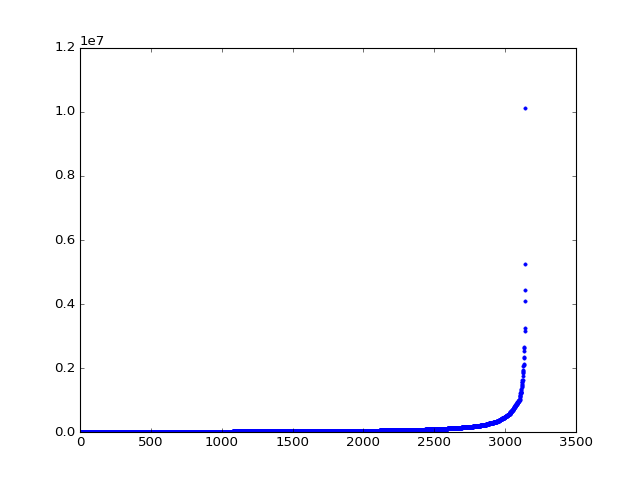

In [25]:
plt.plot(sorted(popv),'.')

<IPython.core.display.Javascript object>


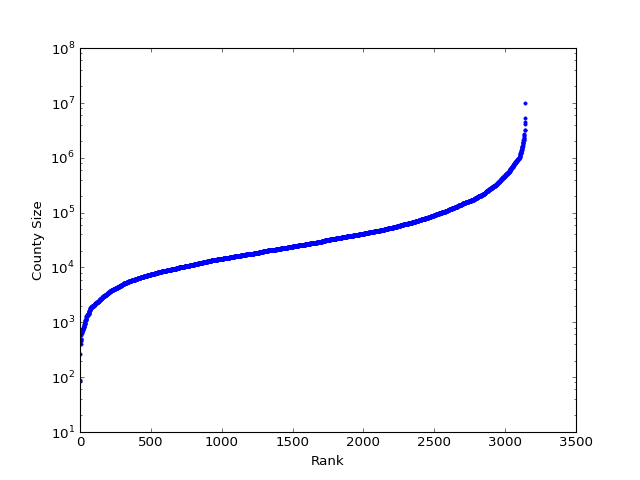

In [26]:
plt.figure()
plt.semilogy(sorted(popv),'.')

In [27]:
plt.ylabel('County Size')
plt.xlabel('Rank')

Is this a log-normal distribution?

# Groupby
Groupby is a very useful operation on tables.
It collects together parts of the DataFrame by the values in a column.
To then produce a table, we must provide some way of aggregating the groups.
`size()` is one such aggregator

In [28]:
# make a DataFrame containing only two columns
pop_facts = facts[['state_abbreviation', 'PST045214']]
pop_facts.head()

,state_abbreviation,PST045214
2,AL,55395
3,AL,200111
4,AL,26887
5,AL,22506
6,AL,57719


In [29]:
# Here, we compute the population of each state by summing the population of its counties.
# This way of doing it produces a DataFrame
state_pop = pop_facts.groupby('state_abbreviation').sum()
state_pop

,PST045214
state_abbreviation,
AK,736732
AL,4849377
AR,2966369
AZ,6731484
CA,38802500
CO,5355866
CT,3596677
DC,658893
DE,935614


In [30]:
type(state_pop)

pandas.core.frame.DataFrame

In [31]:
# how many counties per state
# this way of doing it produces a Series.
num_counties = facts.groupby('state_abbreviation').size()
num_counties

state_abbreviation
AK     29
AL     67
AR     75
AZ     15
CA     58
CO     64
CT      8
DC      1
DE      3
FL     67
GA    159
HI      5
IA     99
ID     44
IL    102
IN     92
KS    105
KY    120
LA     64
MA     14
MD     24
ME     16
MI     83
MN     87
MO    115
MS     82
MT     56
NC    100
ND     53
NE     93
NH     10
NJ     21
NM     33
NV     17
NY     62
OH     88
OK     77
OR     36
PA     67
RI      5
SC     46
SD     66
TN     95
TX    254
UT     29
VA    134
VT     14
WA     39
WI     72
WV     55
WY     23
dtype: int64

In [32]:
# A series is a column of a DataFrame
type(num_counties)

pandas.core.series.Series

In [33]:
# let's rename the population column,
# and add the number of counties to the DataFrame
state_pop = state_pop.rename(columns={'PST045214':'pop'})
state_pop['counties'] = num_counties
state_pop


,pop,counties
state_abbreviation,,
AK,736732,29
AL,4849377,67
AR,2966369,75
AZ,6731484,15
CA,38802500,58
CO,5355866,64
CT,3596677,8
DC,658893,1
DE,935614,3


<IPython.core.display.Javascript object>


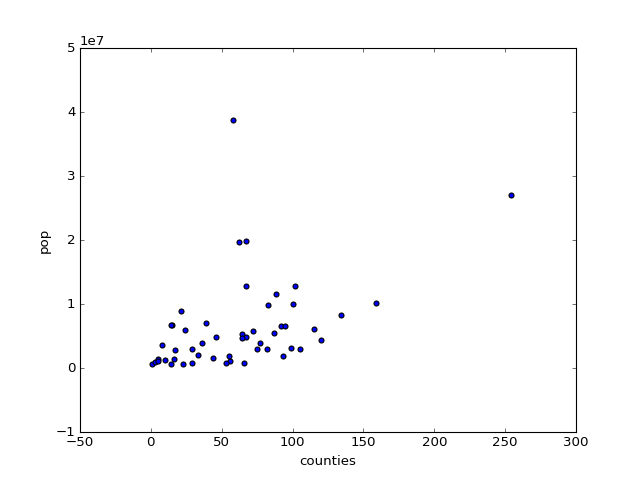

In [34]:
# here is a scatter plot of these.  This is Pandas using a Matplotlib plot
state_pop.plot.scatter(x='counties',y='pop')

In [35]:
# here are the 10 largest counties
facts.nlargest(10,'PST045214')

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
210,6037,Los Angeles County,CA,10116705,9818664,3.0,9818605,6.4,22.8,12.2,...,21.6,30.2,153343705,198435837,119111840,12236,20238148,17659,4057.88,2419.6
625,17031,Cook County,IL,5246456,5195060,1.0,5194675,6.5,22.6,12.9,...,7.2,32.3,77932858,83964561,60585557,11571,13094372,7753,945.33,5495.1
2668,48201,Harris County,TX,4441370,4093011,8.5,4092459,7.7,27.1,9.2,...,23.0,29.2,169275136,205478751,51899053,13276,7874724,40060,1703.48,2402.4
107,4013,Maricopa County,AZ,4087191,3817357,7.1,3817117,6.7,25.1,13.8,...,9.2,27.3,40182099,49760315,58688328,15153,8408940,18597,9200.14,414.9
228,6073,San Diego County,CA,3263431,3095308,5.4,3095313,6.6,22.3,12.7,...,15.2,29.9,27541073,33704921,38710620,13009,9551513,6875,4206.63,735.8
221,6059,Orange County,CA,3145515,3010269,4.5,3010232,6.1,23.0,13.1,...,12.4,28.4,49131942,97963621,45022513,15221,8247828,9291,790.57,3807.7
373,12086,Miami-Dade County,FL,2662874,2498017,6.6,2496435,5.8,20.6,15.2,...,60.5,28.9,9347116,60760055,34530470,14074,6005856,7731,1897.72,1315.5
1885,36047,Kings County,NY,2621793,2504709,4.7,2504700,7.6,23.3,12.1,...,10.8,33.6,4555642,13802231,15431858,6077,1544409,7551,70.82,35369.1
2624,48113,Dallas County,TX,2518638,2367636,6.4,2368139,7.7,26.9,9.7,...,15.3,28.1,39047030,58165146,33177208,13929,5705137,14360,871.28,2718.0
224,6065,Riverside County,CA,2329271,2189757,6.4,2189641,6.8,26.3,13.2,...,24.0,30.4,13623526,16912263,24146447,11745,4835331,6761,7206.48,303.8


## make DataFrames for Clinton and Trump

In [36]:
trump = results[results.candidate == 'Donald Trump']
trump.shape

(3586, 8)

In [37]:
trump.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
135,Alabama,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445
140,Alabama,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469
145,Alabama,AL,Barbour,1005.0,Republican,Donald Trump,1710,0.501
150,Alabama,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494
155,Alabama,AL,Blount,1009.0,Republican,Donald Trump,7390,0.487


In [38]:
# this deletes a column from a DataFrame
del trump['state']

In [39]:
trump.head()

,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
135,AL,Autauga,1001.0,Republican,Donald Trump,5387,0.445
140,AL,Baldwin,1003.0,Republican,Donald Trump,23618,0.469
145,AL,Barbour,1005.0,Republican,Donald Trump,1710,0.501
150,AL,Bibb,1007.0,Republican,Donald Trump,1959,0.494
155,AL,Blount,1009.0,Republican,Donald Trump,7390,0.487


In [40]:
del trump['candidate']
del trump['party']
trump.head()

,state_abbreviation,county,fips,votes,fraction_votes
135,AL,Autauga,1001.0,5387,0.445
140,AL,Baldwin,1003.0,23618,0.469
145,AL,Barbour,1005.0,1710,0.501
150,AL,Bibb,1007.0,1959,0.494
155,AL,Blount,1009.0,7390,0.487


In [41]:
clinton = results[results.candidate == 'Hillary Clinton']
clinton.shape

(4205, 8)

In [42]:
del clinton['candidate']
del clinton['party']
del clinton['state']
clinton.head()

,state_abbreviation,county,fips,votes,fraction_votes
1,AL,Autauga,1001.0,2387,0.800
3,AL,Baldwin,1003.0,5290,0.647
5,AL,Barbour,1005.0,2567,0.906
7,AL,Bibb,1007.0,942,0.755
9,AL,Blount,1009.0,564,0.551


In [43]:
# give unique names to the columns so that we can merge them together
clinton = clinton.rename(columns={'fraction_votes':'c_frac', 'votes':'c_votes'})
clinton.head()

,state_abbreviation,county,fips,c_votes,c_frac
1,AL,Autauga,1001.0,2387,0.800
3,AL,Baldwin,1003.0,5290,0.647
5,AL,Barbour,1005.0,2567,0.906
7,AL,Bibb,1007.0,942,0.755
9,AL,Blount,1009.0,564,0.551


In [44]:
trump = trump.rename(columns={'fraction_votes':'t_frac', 'votes':'t_votes'})
trump.head()

,state_abbreviation,county,fips,t_votes,t_frac
135,AL,Autauga,1001.0,5387,0.445
140,AL,Baldwin,1003.0,23618,0.469
145,AL,Barbour,1005.0,1710,0.501
150,AL,Bibb,1007.0,1959,0.494
155,AL,Blount,1009.0,7390,0.487


In [45]:
# We want to use the fips number to combine all these tables.
# but, we will see that it is a float64 in trump, and an int64 in facts
# we will need to fix this
trump.dtypes

state_abbreviation     object
county                 object
fips                  float64
t_votes                 int64
t_frac                float64
dtype: object

In [46]:
facts.dtypes

fips                    int64
area_name              object
state_abbreviation     object
PST045214               int64
PST040210               int64
PST120214             float64
POP010210               int64
AGE135214             float64
AGE295214             float64
AGE775214             float64
SEX255214             float64
RHI125214             float64
RHI225214             float64
RHI325214             float64
RHI425214             float64
RHI525214             float64
RHI625214             float64
RHI725214             float64
RHI825214             float64
POP715213             float64
POP645213             float64
POP815213             float64
EDU635213             float64
EDU685213             float64
VET605213               int64
LFE305213             float64
HSG010214               int64
HSG445213             float64
HSG096213             float64
HSG495213               int64
HSD410213               int64
HSD310213             float64
INC910213               int64
INC110213 

In [47]:
# int converts a float to an int
int(3.1)

3

In [48]:
# let's try applying int to each fips entry in trump
# this will cause an error!
trump.fips = trump.fips.apply(int)

ValueError: cannot convert float NaN to integer

In [49]:
# because there are null values.  NaN stands for Not a Number!
sum(trump.fips.isnull())

10

In [50]:
# let's look at them
# this notation selects certain rows of the table
trump[trump.fips.isnull()]

,state_abbreviation,county,fips,t_votes,t_frac
14610,NH,Belknap,NaN,5505,0.360110
14618,NH,Carroll,NaN,4182,0.345391
14626,NH,Cheshire,NaN,4543,0.344951
14634,NH,Coos,NaN,2183,0.382915
14642,NH,Grafton,NaN,4898,0.304280
14650,NH,Hillsborough,NaN,28981,0.353724
14658,NH,Merrimack,NaN,10966,0.338175
14666,NH,Rockingham,NaN,28716,0.393710
14674,NH,Strafford,NaN,7352,0.343760
14682,NH,Sullivan,NaN,3080,0.380952


In [51]:
facts[facts.state_abbreviation=='NH']

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
1795,33001,Belknap County,NH,60305,60092,0.4,60088,4.7,19.5,19.9,...,0.0,23.7,687068,0,1348651,22099,151572,198,400.23,150.1
1796,33003,Carroll County,NH,47399,47820,-0.9,47818,3.8,16.8,24.5,...,0.4,19.6,213380,0,889015,18569,214906,197,931.06,51.4
1797,33005,Cheshire County,NH,76115,77117,-1.3,77117,4.7,18.6,17.3,...,0.6,22.6,1095187,0,1649001,21293,110289,141,706.66,109.1
1798,33007,Coos County,NH,31653,33052,-4.2,33055,4.2,17.7,21.8,...,0.0,0.0,295901,0,602906,18656,85674,56,1794.69,18.4
1799,33009,Grafton County,NH,89658,89114,0.6,89118,4.3,17.2,18.0,...,0.3,24.0,1314279,0,1961272,22919,272818,187,1708.75,52.2
1800,33011,Hillsborough County,NH,405184,400721,1.1,400721,5.4,21.7,13.9,...,2.0,26.3,7707601,3873122,7647259,18989,732310,968,876.14,457.4
1801,33013,Merrimack County,NH,147171,146442,0.5,146445,4.8,19.9,16.1,...,0.9,24.6,1539636,2812352,2605617,17536,223534,312,934.12,156.8
1802,33015,Rockingham County,NH,300621,295220,1.8,295223,4.6,20.6,15.2,...,0.9,27.8,3912579,5844817,6414862,21603,660746,875,694.72,425.0
1803,33017,Strafford County,NH,125604,123146,2.0,123143,5.0,19.5,13.8,...,0.8,26.8,1185999,351111,1672899,13701,146812,416,368.98,333.7
1804,33019,Sullivan County,NH,43103,43742,-1.5,43742,4.7,19.7,18.9,...,0.0,24.8,640776,0,562392,13154,32307,53,537.31,81.4


In [52]:
nhfips = facts[facts.state_abbreviation=='NH'].fips
nhfips

1795    33001
1796    33003
1797    33005
1798    33007
1799    33009
1800    33011
1801    33013
1802    33015
1803    33017
1804    33019
Name: fips, dtype: int64

In [53]:
# I should probably use some string matching on county names to transfer
# the fips from facts to trump.  But, instead I'll observe that they are sorted
# alphabetically, so I can just use a loop to move one to the other

ind = trump[trump.fips.isnull()].index
for i in range(10):
    trump.set_value(ind[i],'fips',nhfips.iloc[i])
trump[trump.state_abbreviation=='NH']

,state_abbreviation,county,fips,t_votes,t_frac
14610,NH,Belknap,33001.0,5505,0.360110
14618,NH,Carroll,33003.0,4182,0.345391
14626,NH,Cheshire,33005.0,4543,0.344951
14634,NH,Coos,33007.0,2183,0.382915
14642,NH,Grafton,33009.0,4898,0.304280
14650,NH,Hillsborough,33011.0,28981,0.353724
14658,NH,Merrimack,33013.0,10966,0.338175
14666,NH,Rockingham,33015.0,28716,0.393710
14674,NH,Strafford,33017.0,7352,0.343760
14682,NH,Sullivan,33019.0,3080,0.380952


In [54]:
clinton[clinton.fips.isnull()]

,state_abbreviation,county,fips,c_votes,c_frac
14588,NH,Belknap,NaN,3490,0.368143
14590,NH,Carroll,NaN,3230,0.363534
14592,NH,Cheshire,NaN,5166,0.292907
14594,NH,Coos,NaN,2013,0.356283
14596,NH,Grafton,NaN,6918,0.326691
14598,NH,Hillsborough,NaN,28099,0.420990
14600,NH,Merrimack,NaN,12209,0.403137
14602,NH,Rockingham,NaN,22829,0.423473
14604,NH,Strafford,NaN,8801,0.356807
14606,NH,Sullivan,NaN,2497,0.297156


In [55]:
ind = clinton[clinton.fips.isnull()].index
for i in range(10):
    clinton.set_value(ind[i],'fips',nhfips.iloc[i])
clinton[clinton.state_abbreviation=='NH']

,state_abbreviation,county,fips,c_votes,c_frac
14588,NH,Belknap,33001.0,3490,0.368143
14590,NH,Carroll,33003.0,3230,0.363534
14592,NH,Cheshire,33005.0,5166,0.292907
14594,NH,Coos,33007.0,2013,0.356283
14596,NH,Grafton,33009.0,6918,0.326691
14598,NH,Hillsborough,33011.0,28099,0.420990
14600,NH,Merrimack,33013.0,12209,0.403137
14602,NH,Rockingham,33015.0,22829,0.423473
14604,NH,Strafford,33017.0,8801,0.356807
14606,NH,Sullivan,33019.0,2497,0.297156


In [56]:
trump.fips = trump.fips.apply(int)
trump.head()

,state_abbreviation,county,fips,t_votes,t_frac
135,AL,Autauga,1001,5387,0.445
140,AL,Baldwin,1003,23618,0.469
145,AL,Barbour,1005,1710,0.501
150,AL,Bibb,1007,1959,0.494
155,AL,Blount,1009,7390,0.487


In [57]:
clinton.fips = clinton.fips.apply(int)
clinton.head()

,state_abbreviation,county,fips,c_votes,c_frac
1,AL,Autauga,1001,2387,0.800
3,AL,Baldwin,1003,5290,0.647
5,AL,Barbour,1005,2567,0.906
7,AL,Bibb,1007,942,0.755
9,AL,Blount,1009,564,0.551


# Merge Tables.  This is a SQL Join.

In [58]:
election = pd.merge(facts, trump, on="fips", how="inner")

In [59]:
election.head()

,fips,area_name,state_abbreviation_x,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,state_abbreviation_y,county,t_votes,t_frac
0,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,598175,12003,88157,131,594.44,91.8,AL,Autauga,5387,0.445
1,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,2966489,17166,436955,1384,1589.78,114.6,AL,Baldwin,23618,0.469
2,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,188337,6334,0,8,884.88,31.0,AL,Barbour,1710,0.501
3,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,124707,5804,10757,19,622.58,36.8,AL,Bibb,1959,0.494
4,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,319700,5622,20941,3,644.78,88.9,AL,Blount,7390,0.487


In [60]:
# Let's try that again, but only grabbing the columns from trump that we really need.
election = pd.merge(facts, trump[['fips','t_votes','t_frac']], on="fips", how="inner")
election.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,t_votes,t_frac
0,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0,0,598175,12003,88157,131,594.44,91.8,5387,0.445
1,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1410273,0,2966489,17166,436955,1384,1589.78,114.6,23618,0.469
2,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0,0,188337,6334,0,8,884.88,31.0,1710,0.501
3,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0,0,124707,5804,10757,19,622.58,36.8,1959,0.494
4,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,341544,0,319700,5622,20941,3,644.78,88.9,7390,0.487


In [61]:
election = pd.merge(election, clinton[['fips','c_votes','c_frac']], on="fips", how="inner")

In [62]:
election.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,t_votes,t_frac,c_votes,c_frac
0,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,598175,12003,88157,131,594.44,91.8,5387,0.445,2387,0.800
1,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,2966489,17166,436955,1384,1589.78,114.6,23618,0.469,5290,0.647
2,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,188337,6334,0,8,884.88,31.0,1710,0.501,2567,0.906
3,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,124707,5804,10757,19,622.58,36.8,1959,0.494,942,0.755
4,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,319700,5622,20941,3,644.78,88.9,7390,0.487,564,0.551


In [63]:
print clinton.shape
print trump.shape
print facts.shape
print election.shape

(4205, 5)
(3586, 5)
(3143, 54)
(2721, 58)


We lost a lot of rows.  We will figure out why later.

<IPython.core.display.Javascript object>


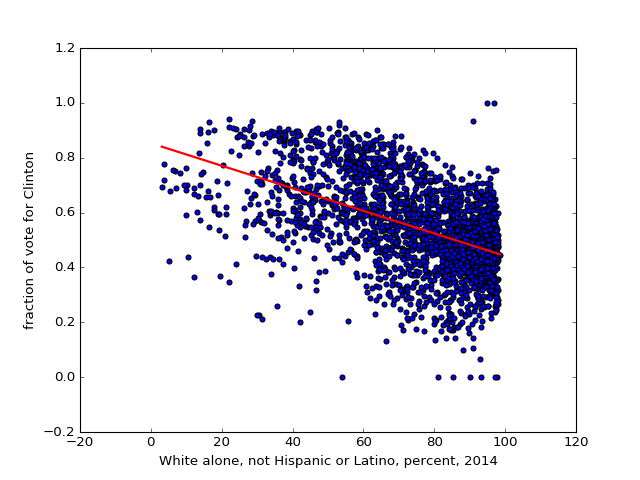

In [64]:
# let's plot some tends we have been told to expect
election.plot.scatter(x='RHI825214',y='c_frac')
plt.xlabel(fact_dict.loc['RHI825214'].description)
plt.ylabel('fraction of vote for Clinton')

In [65]:
## let's compute the best fit line, using least squares
A = election['RHI825214'].as_matrix()
A.shape


(2721,)

In [66]:
A = np.reshape(A,(A.size,1))
A.shape

(2721, 1)

In [67]:
# append an all-1s column to A
A = np.hstack((A, np.ones((2721,1))))
b = election['c_frac'].as_matrix()
b

array([ 0.8  ,  0.647,  0.906, ...,  0.438,  0.385,  0.395])

In [68]:
Atrans = A.transpose()
x = np.linalg.inv(Atrans.dot(A)).dot(Atrans.dot(b))
x

array([-0.00411099,  0.85302569])

In [69]:
xrange = np.array([min(A[:,0]), max(A[:,0])])
xrange

array([  3.1,  98.6])

In [70]:
# We now add a the best-fit line to that plot.
# This is why we keep the plots around.
h = plt.plot(xrange, xrange*x[0] + x[1],color='red',linewidth=2)

### Search to see if there are any other identifiable trends.
By doing the same thing for every column, and checking the slopes of the lines we get.

In [71]:
cols = election.columns[3:-4]
cols

Index([u'PST045214', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'AGE295214', u'AGE775214', u'SEX255214', u'RHI125214', u'RHI225214',
       u'RHI325214', u'RHI425214', u'RHI525214', u'RHI625214', u'RHI725214',
       u'RHI825214', u'POP715213', u'POP645213', u'POP815213', u'EDU635213',
       u'EDU685213', u'VET605213', u'LFE305213', u'HSG010214', u'HSG445213',
       u'HSG096213', u'HSG495213', u'HSD410213', u'HSD310213', u'INC910213',
       u'INC110213', u'PVY020213', u'BZA010213', u'BZA110213', u'BZA115213',
       u'NES010213', u'SBO001207', u'SBO315207', u'SBO115207', u'SBO215207',
       u'SBO515207', u'SBO415207', u'SBO015207', u'MAN450207', u'WTN220207',
       u'RTN130207', u'RTN131207', u'AFN120207', u'BPS030214', u'LND110210',
       u'POP060210'],
      dtype='object')

In [72]:
nc = len(cols)
nc

51

In [73]:
slopes = np.zeros(nc)
lines = np.zeros((nc,2))
xranges = np.zeros((nc,2))
for i in range(nc):
    a = election[cols[i]].as_matrix()
    A = np.reshape(a,(a.size,1))
    A = np.hstack((A, np.ones((2721,1))))
    b = election['c_frac'].as_matrix()
    Atrans = A.transpose()
    x = np.linalg.inv(Atrans.dot(A)).dot(Atrans.dot(b))
    lines[i,:] = x
    xranges[i,:] = [max(a), min(a)]
    slopes[i] = abs(x[0])*(max(a)-min(a))
slopes    

array([ 0.21897135,  0.22045563,  0.08585199,  0.22041821,  0.1293298 ,
        0.07261254,  0.15784183,  0.22731679,  0.51804161,  0.62312866,
        0.29531154,  0.04508903,  0.413932  ,  0.76914228,  0.09768342,
        0.3925999 ,  0.13161584,  0.08048621,  0.09936856,  0.48934286,
        0.18924382,  0.12879959,  0.18516068,  0.20748336,  0.17550077,
        0.03693421,  0.22084628,  0.20107394,  0.26448777,  0.22847823,
        0.22654217,  0.38745749,  0.17895536,  0.19374683,  0.07415944,
        0.27140234,  0.23020625,  0.61273306,  0.24546104,  0.10803073,
        0.30950038,  0.19865137,  0.07118098,  0.14552515,  0.1962401 ,
        0.18263682,  0.16977012,  0.15761724,  0.19275358,  0.36124485,
        0.31239258])

In [74]:
ind = np.argmax(slopes)
ind

13

In [75]:
col = cols[ind]
col

'RHI625214'

In [76]:
slopes[ind]

0.76914227854941675

<IPython.core.display.Javascript object>


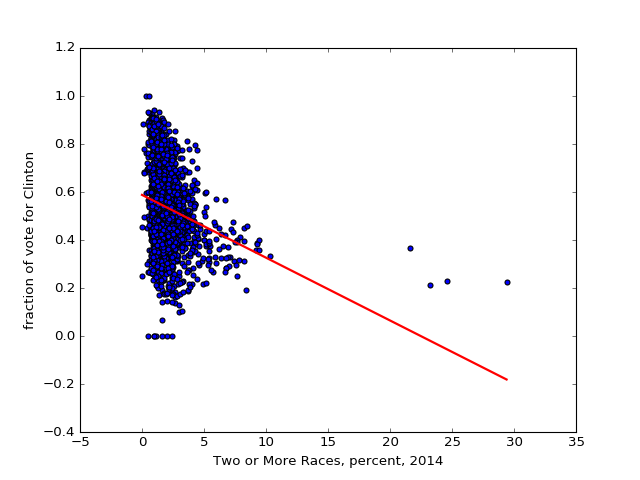

In [77]:
election.plot.scatter(x=col,y='c_frac')
plt.xlabel(fact_dict.loc[col].description)
plt.ylabel('fraction of vote for Clinton')

x = lines[ind,:]
xrange = xranges[ind,:]
h = plt.plot(xrange, xrange*x[0] + x[1],color='red',linewidth=2)



## This time, for Trump

In [78]:
slopes = np.zeros(nc)
lines = np.zeros((nc,2))
xranges = np.zeros((nc,2))
for i in range(nc):
    a = election[cols[i]].as_matrix()
    A = np.reshape(a,(a.size,1))
    A = np.hstack((A, np.ones((2721,1))))
    b = election['t_frac'].as_matrix()
    Atrans = A.transpose()
    x = np.linalg.inv(Atrans.dot(A)).dot(Atrans.dot(b))
    lines[i,:] = x
    xranges[i,:] = [max(a), min(a)]
    slopes[i] = abs(x[0])*(max(a)-min(a))
slopes  

array([ 0.14611112,  0.16300784,  0.27363822,  0.16308321,  0.26871044,
        0.34431267,  0.39096012,  0.08649924,  0.00247037,  0.05510525,
        0.25835921,  0.09668882,  0.04681471,  0.09879784,  0.11823176,
        0.06091184,  0.28962715,  0.05333837,  0.0905106 ,  0.03148675,
        0.13202451,  0.08385681,  0.05299727,  0.11662331,  0.02579914,
        0.07642623,  0.19815917,  0.1284903 ,  0.23288672,  0.04748565,
        0.12208201,  0.08012713,  0.12922958,  0.0070506 ,  0.40047241,
        0.09438274,  0.13492366,  0.04685062,  0.02851623,  0.14338602,
        0.01192722,  0.01431125,  0.0114247 ,  0.08657923,  0.04325305,
        0.10157566,  0.12537203,  0.09986729,  0.23201665,  0.39981289,
        0.04976635])

In [79]:
ind = np.argmax(slopes)
ind

34

In [80]:
col = cols[ind]
col

'BZA115213'

<IPython.core.display.Javascript object>


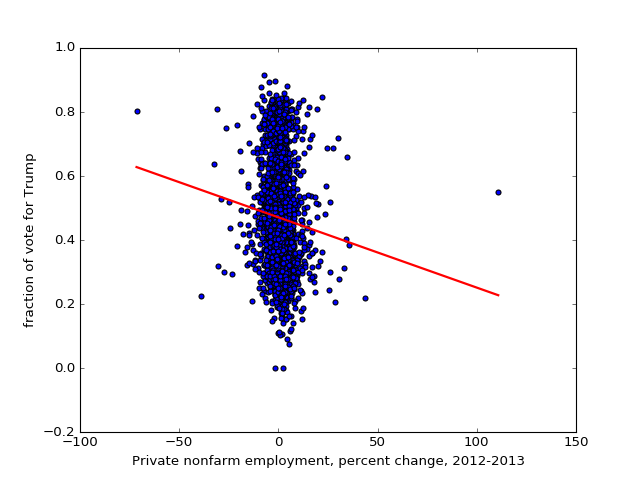

In [81]:
election.plot.scatter(x=col,y='t_frac')
plt.xlabel(fact_dict.loc[col].description)
plt.ylabel('fraction of vote for Trump')
x = lines[ind,:]
xrange = xranges[ind,:]
h = plt.plot(xrange, xrange*x[0] + x[1],color='red',linewidth=2)

## Regression using all the data

In [82]:
# We divide our data into training data and test data.
# I only believe regression if it gives good results on test data (on which it was not trained.)
ncounties = election.shape[0]
select = np.random.rand(ncounties) < 0.9
print sum(select)
train = election[select]
test = election[~select]
print train.shape
print test.shape

2467
(2467, 58)
(254, 58)


In [83]:
# just take the columns that represent percents
pcols = cols[4:21]
pcols

Index([u'AGE135214', u'AGE295214', u'AGE775214', u'SEX255214', u'RHI125214',
       u'RHI225214', u'RHI325214', u'RHI425214', u'RHI525214', u'RHI625214',
       u'RHI725214', u'RHI825214', u'POP715213', u'POP645213', u'POP815213',
       u'EDU635213', u'EDU685213'],
      dtype='object')

In [84]:
A = train[pcols].as_matrix()
A = np.hstack((A, np.ones((train.shape[0],1))))
print type(A)
print A.shape

<type 'numpy.ndarray'>
(2467, 18)


In [85]:
b = train['c_frac'].as_matrix()
print type(b)
print b.shape

<type 'numpy.ndarray'>
(2467,)


In [86]:
# solve the linear regression problem
Atrans = A.transpose()
x = np.linalg.inv(Atrans.dot(A)).dot(Atrans.dot(b))

# and, report the average square error
np.mean((A.dot(x)-b)**2)

0.010776691943377418

In [87]:
# compre this to the average error if we just guessed the average
np.mean((np.mean(b)-b)**2)

0.02541508053756095

In [88]:
# Now, try it on the test data
Atest = test[pcols].as_matrix()
Atest = np.hstack((Atest, np.ones((test.shape[0],1))))
btest = test['c_frac'].as_matrix()

print "using x", np.mean((Atest.dot(x) - btest)**2)
print "using mean", np.mean((np.mean(btest) - btest)**2)

using x 0.0114414544196
using mean 0.0258314206708


In [89]:
x_meaning = pd.Series(x[:-1], index=pcols)
x_meaning

AGE135214   -0.015200
AGE295214    0.006229
AGE775214    0.004397
SEX255214    0.004647
RHI125214   -0.009741
RHI225214   -0.010462
RHI325214   -0.017167
RHI425214   -0.008753
RHI525214   -0.008878
RHI625214   -0.040117
RHI725214   -0.005027
RHI825214   -0.008057
POP715213    0.000089
POP645213   -0.002552
POP815213   -0.000341
EDU635213   -0.002562
EDU685213   -0.000096
dtype: float64

In [90]:
x_meaning.to_frame().join(fact_dict)

,0,description
AGE135214,-0.015200,"Persons under 5 years, percent, 2014"
AGE295214,0.006229,"Persons under 18 years, percent, 2014"
AGE775214,0.004397,"Persons 65 years and over, percent, 2014"
SEX255214,0.004647,"Female persons, percent, 2014"
RHI125214,-0.009741,"White alone, percent, 2014"
RHI225214,-0.010462,"Black or African American alone, percent, 2014"
RHI325214,-0.017167,"American Indian and Alaska Native alone, perce..."
RHI425214,-0.008753,"Asian alone, percent, 2014"
RHI525214,-0.008878,Native Hawaiian and Other Pacific Islander alo...
RHI625214,-0.040117,"Two or More Races, percent, 2014"


# Figuring out which counties were missing

In [91]:
# here is an example of using isin (and in)
NewEngland = ['CT','MA','NH','ME', 'VT', 'RI']
'CT' in NewEngland

True

In [92]:
state_pop = state_pop.reset_index()
state_pop.head()

,state_abbreviation,pop,counties
0,AK,736732,29
1,AL,4849377,67
2,AR,2966369,75
3,AZ,6731484,15
4,CA,38802500,58


In [93]:
state_pop[state_pop.state_abbreviation.isin(NewEngland)]

,state_abbreviation,pop,counties
6,CT,3596677,8
19,MA,6745408,14
21,ME,1330089,16
30,NH,1326813,10
39,RI,1055173,5
46,VT,626562,14


In [94]:
# lets see which rows from clinton did not make it into election.
# the ~ (tilde) symbol takes the negation.
clinton[~clinton.fips.isin(election.fips)]

,state_abbreviation,county,fips,c_votes,c_frac
470,AK,State House District 1,90200101,3,0.250
472,AK,State House District 10,90200110,2,0.200
474,AK,State House District 11,90200111,2,0.182
476,AK,State House District 12,90200112,0,0.000
478,AK,State House District 13,90200113,2,0.286
480,AK,State House District 14,90200114,4,0.308
482,AK,State House District 15,90200115,1,0.111
484,AK,State House District 16,90200116,3,0.200
486,AK,State House District 17,90200117,4,0.286
488,AK,State House District 18,90200118,4,0.222


In the case of VT, it seems to be due to an error in the fips number that we used to merge the data.

In [95]:
facts[facts.state_abbreviation=='VT']

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
2853,50001,Addison County,VT,37009,36824,0.5,36821,4.3,18.2,16.9,...,0.0,22.1,538957,101400,464847,12657,48164,101,766.33,48.0
2854,50003,Bennington County,VT,36445,37125,-1.8,37125,4.7,19.5,21.2,...,0.6,24.8,571644,0,833024,22861,106659,35,674.98,55.0
2855,50005,Caledonia County,VT,30981,31226,-0.8,31227,4.8,20.4,17.8,...,0.0,28.0,339060,66247,412719,13565,29922,49,648.86,48.1
2856,50007,Chittenden County,VT,160531,156540,2.5,156545,4.9,18.7,13.2,...,1.0,28.2,4823542,2392465,2740931,18188,360756,533,536.58,291.7
2857,50009,Essex County,VT,6125,6306,-2.9,6306,4.3,17.6,23.3,...,0.0,23.8,62793,0,15031,2325,3090,9,663.60,9.5
2858,50011,Franklin County,VT,48642,47752,1.9,47746,6.0,23.1,13.9,...,0.0,23.6,0,413283,545346,11383,39606,152,633.71,75.3
2859,50013,Grand Isle County,VT,6994,6970,0.3,6970,4.6,18.9,17.9,...,0.0,0.0,0,9066,39465,5229,6528,21,81.81,85.2
2860,50015,Lamoille County,VT,25082,24475,2.5,24475,5.2,21.2,15.2,...,0.0,31.4,0,0,313467,12412,174189,66,458.80,53.3
2861,50017,Orange County,VT,28859,28936,-0.3,28936,4.8,19.7,17.6,...,0.0,24.7,161917,0,237240,8181,26208,39,687.03,42.1
2862,50019,Orleans County,VT,27082,27231,-0.5,27231,4.9,20.1,20.3,...,0.0,18.2,0,73373,324145,11858,36307,200,693.27,39.3


In [96]:
clinton[clinton.state_abbreviation=='VT']

,state_abbreviation,county,fips,c_votes,c_frac
21035,VT,Addison,95000001,40,0.137
21037,VT,Albany,95000002,16,0.103
21039,VT,Alburgh,95000003,31,0.089
21041,VT,Andover,95000004,14,0.122
21043,VT,Arlington,95000005,84,0.174
21045,VT,Athens,95000006,5,0.081
21047,VT,Bakersfield,95000007,22,0.083
21049,VT,Baltimore,95000008,1,0.023
21051,VT,Barnard,95000009,46,0.177
21053,VT,Barnet,95000010,31,0.091


<b>Before believing any of our results, we should fix the problem of missing data!
This would involve understanding the (possibly many) reasons each county didn't make it in</b>